# Project: Appointment dataset Analysis

## Introduction
I will be working on the 'noshowappointments-kagglev2-may-2016.csv' dataset. The dataset provides information on patients and whether or not they showed up for their appointments

## Questions
## Below are the questions I  will be addressing
 
 

1.
* how many females and males are there in the dataset?
* how many males and females showed up for their appointment  and what's the percentage ?
* how many males and females missed their appointment  and what's the percentage?

2.how many females received sms and showed up as against those that did not receive any sms but still showed up?

3.
* what percentage of females are diabetic?
* are there female children who are diabetic? how many?
* how many diabetics and alcoholics showed up for the appointment and how many did not?


## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

I will inspect the dataset and check for :
* datatypes 
* missing data values or null values 
* duplicates 
* and among others where necessary 

 Import the required packages 
and load the dataset 


In [1]:
# import the required packages
# and load the dataset 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Inspect the dataset (General overview)

In [2]:
# print/look at the first line of the dataset 
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [3]:
# print/look at the first five lines of the dataset 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# check the shape or dimensions of the dataset(rows and columns)
df.shape

(110527, 14)

In [5]:
# inspect the columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
# funtion to print the columns of the dataset 
def printColumns():
  for i,v in enumerate(df):
    print(i,v)
printColumns()

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


from the above, we can tell that some of the columns have typos, let's rename them and also rename the last column 'No-show' to 'No_show' to get a consistent naming format

In [7]:
#let's rename them and also rename the last column 'No-show' to 'No_show' to get a consistent naming format
df.rename(columns ={'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap',  'No-show' :'No_show'}, inplace = True)

In [8]:
# confirm the changes by printing a few lines of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Inspect the datasets(detailed)
check for :
* datatypes 
* missing data values or null values 
* duplicates 
* and among others where necessary 

In [9]:
# use the info() to inspect the dataset
# use pandas's info function to get a concise summary of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


change the 'ScheduledDay' and 'AppointmentDay'  datatypes  to datetime

In [10]:
#change the 'ScheduledDay' and 'AppointmentDay' datatypes to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
# let's confirm the changes using the info() function 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [12]:
# display first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# check the number of unique entries
df.nunique() 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No_show                2
dtype: int64

In [14]:
# check for missing data entries 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No_show           0
dtype: int64

From the above operation, it's clear that there are no missing data entries in the dataset 

In [15]:
# check for possible duplicates in the dataset
df.duplicated().sum() 

0

From the above operation, it's clear that there are no duplicates in the dataset 

### inspect the columns using  unique() function

In [16]:
# check unique entries of the AppointmentID column
df.AppointmentID.unique()

array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448],
      dtype=int64)

In [17]:
# check the unique entries of the Gender column
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [18]:
# check the unique entries of the ScheduledDay column
df.ScheduledDay.unique()

<DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103549, dtype: datetime64[ns, UTC]

In [19]:
# check the unique entries of the Age column
 
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [20]:
# from the above operation we observed that there's a -1 value in the Age column
# let's check to confirm for sure if there are any more negative values
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [21]:
# same operation performed above but using the query() funtion
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


we found out that the only negative value was -1 which is an unrealistic value for age so we will treat it as an outlier and thus remove it from the original dataset

In [22]:
# remove the outlier from the age column and re-assign the change to the original dataset
# the new dataset will not contain the outlier removed
df = df[df.Age >  0]

let's confirm if it has been removed

In [23]:
# confirm if it has been removed
df[df.Age <  0 ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


from the above we can confirm that it has been removed.
now let's check the dimensions of the orignal dataset after the -1 has been removed and the unique values of the Age column to further confirm

In [24]:
# print the shape/dimension of the dataset after remove the outlier (-1)
df.shape

(106987, 14)

In [25]:
# re-check the number of unique entries of the Age column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   3,   1,  69,  68,  60,  67,  36,  10,  35,
        20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,  24,
        66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  14,
         9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,  86,
        91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99], dtype=int64)

we can confirm from the above that the -1 has been removed

In [26]:
# check the unique entries of the Handicap column
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [27]:
# check the unique entries of the Neighbourhood column
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM',
       'JARDIM CAMBURI', 'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO',
       'RESISTÊNCIA', 'ILHA DE SANTA MARIA', 'JUCUTUQUARA',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'SÃO BENEDITO', 'PRAIA DO CANTO', 'BOA VISTA', 'SANTA LÚCIA',
       'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO JOÃO', 'FONTE GRANDE',
       'MORADA DE CAMBURI', 'ENSEADA DO SUÁ', 'SANTOS R

In [28]:
# convert the Neighbourhood column to string
# convert from 'object' datatype  to string datatype
df['Neighbourhood'] = df['Neighbourhood'].astype(str)

In [29]:
# check the unique entries of the Neighbourhood column
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM',
       'JARDIM CAMBURI', 'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO',
       'RESISTÊNCIA', 'ILHA DE SANTA MARIA', 'JUCUTUQUARA',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'SÃO BENEDITO', 'PRAIA DO CANTO', 'BOA VISTA', 'SANTA LÚCIA',
       'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO JOÃO', 'FONTE GRANDE',
       'MORADA DE CAMBURI', 'ENSEADA DO SUÁ', 'SANTOS R

In [30]:
# re-inspect the dataset uing the info() function 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  int64              
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hypertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handicap        106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  No_show       

In [31]:
# check the unique entries of the Scholarship column
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [32]:
# check the unique entries of the Hypertension column
df['Hypertension'].unique()

array([1, 0], dtype=int64)

In [33]:
# check the unique entries of the Diabetes column
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [34]:
# check the unique entries of the Alcoholism column
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [35]:
# check the number of unique entries of the Handicap column
df['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [36]:
# check the unique entries of the SMS_received column
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [37]:
# check the unique entries of the No_show column
df['No_show'].unique()

array(['No', 'Yes'], dtype=object)

# Exploratory Data Analysis
In this section,I will explore the dataset, perform  decriptive statistics and visualizations in oder to address the questions posed in the 'Questions' section.

In [38]:
# descriptive statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


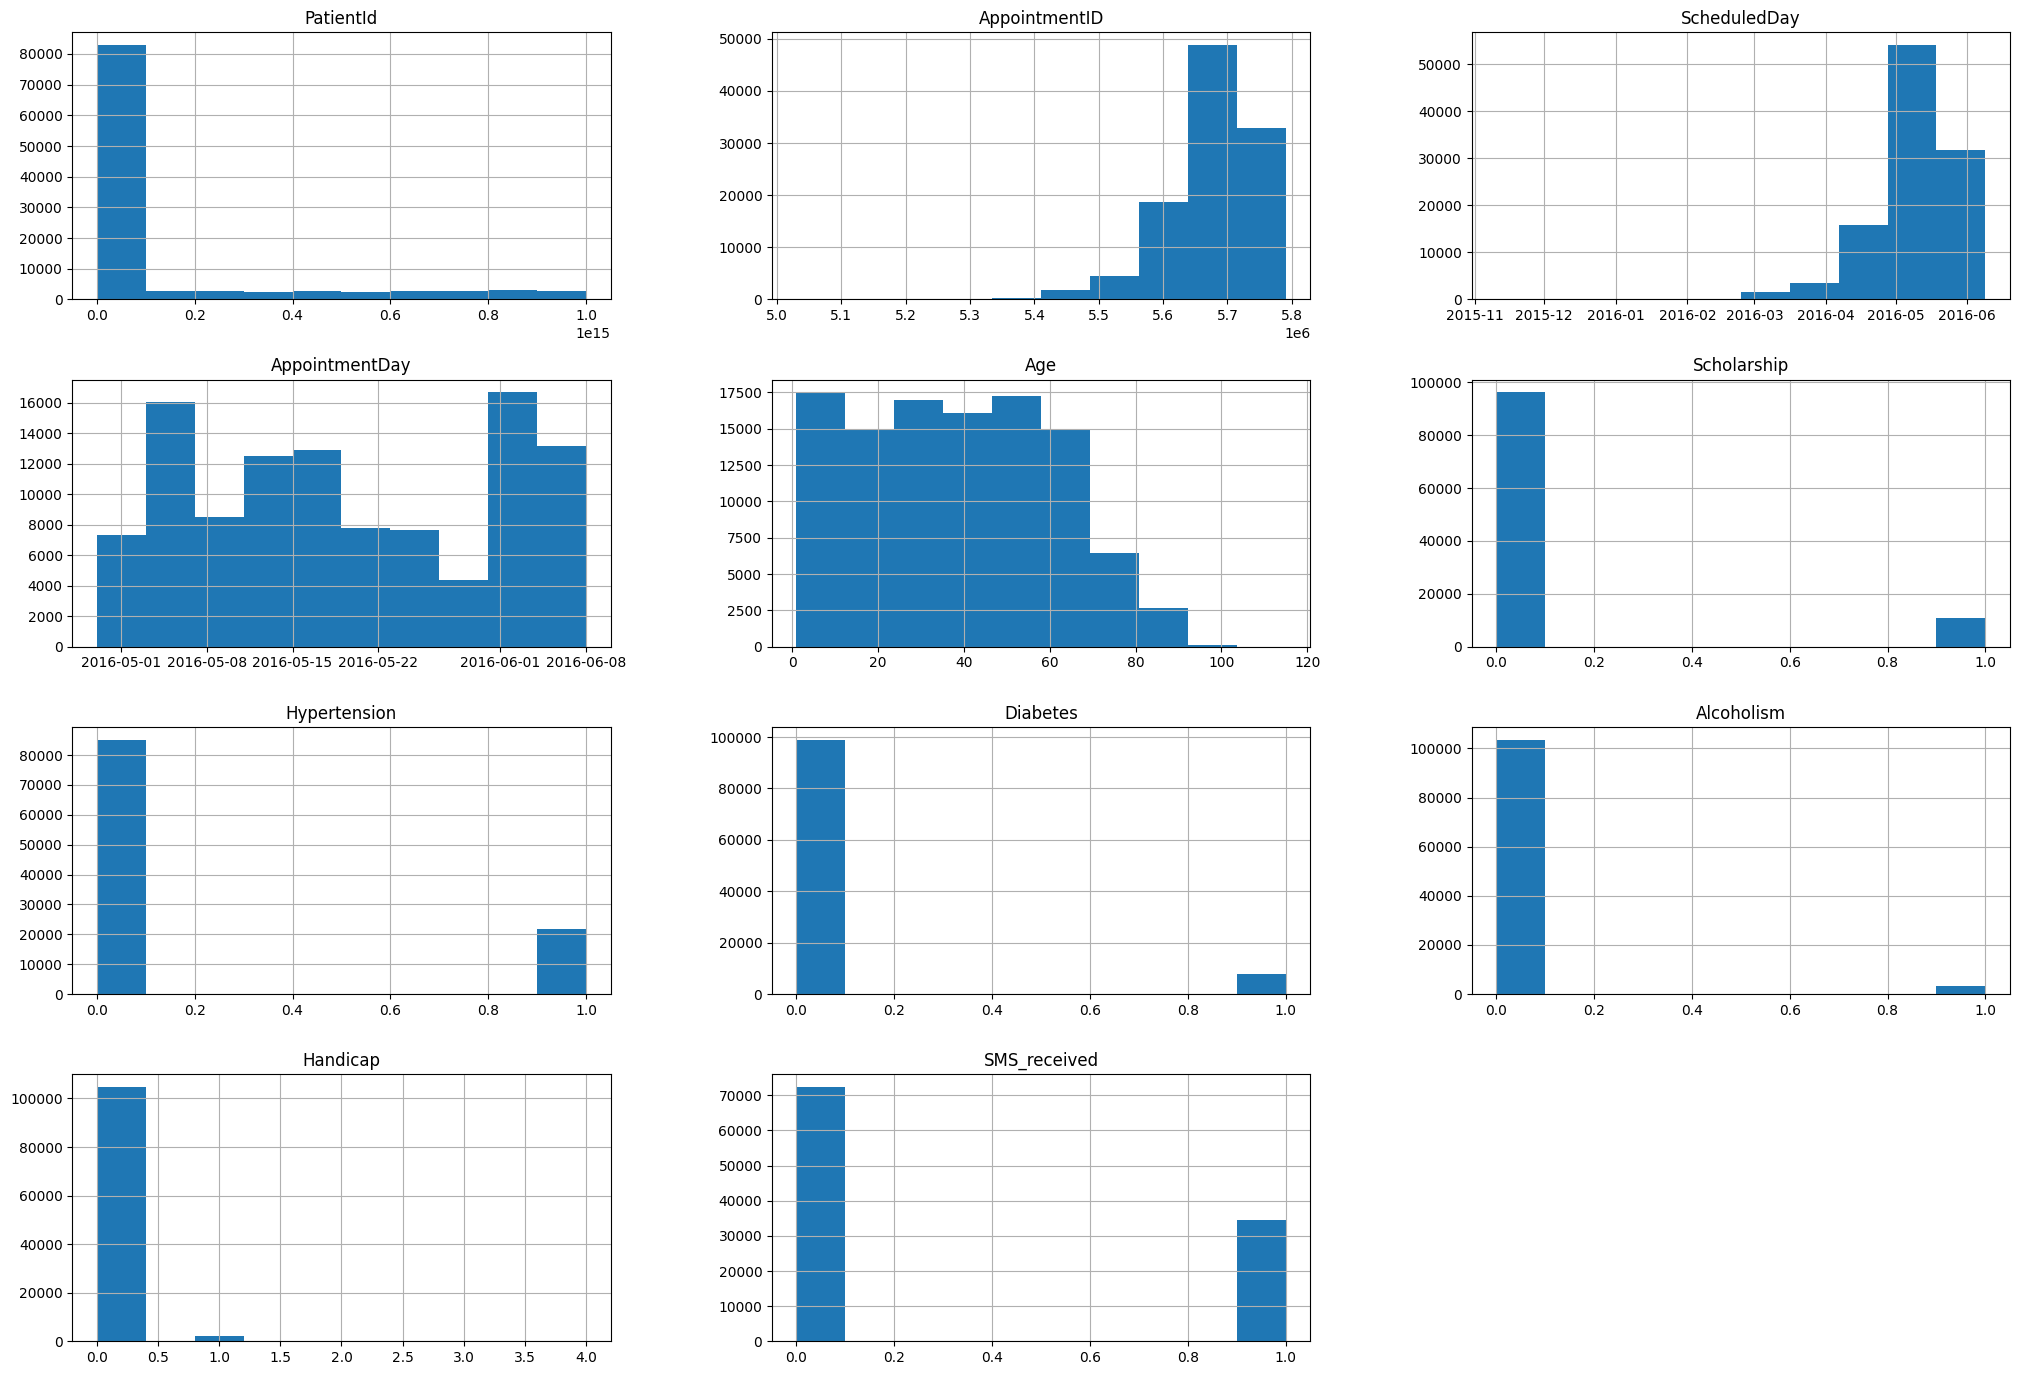

In [39]:
#  histograms of the dataset

df.hist( figsize = (25, 17));

In [40]:
# a query to check the females in the dataset 
df.query('Gender == "F"') 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [41]:
# value counts of the SMS_received column
df.SMS_received.value_counts()

0    72402
1    34585
Name: SMS_received, dtype: int64

from the above, 72402 people did not receive sms while  34585 did. Thus more people did not received sms

In [42]:
# value counts of the No_show column
df.No_show.value_counts()

No     85307
Yes    21680
Name: No_show, dtype: int64

In [43]:
# a query  to check the data on those that missed or did not show up for their appointment 
df1 =df['No_show'] == 'Yes'

In [44]:
# same operation as performed above
df.query('No_show =="Yes"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03 14:43:56+00:00,2016-06-07 00:00:00+00:00,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,6.456342e+14,5786741,M,2016-06-08 08:50:19+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06 17:35:38+00:00,2016-06-08 00:00:00+00:00,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,6.456342e+14,5778621,M,2016-06-06 15:58:05+00:00,2016-06-08 00:00:00+00:00,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


### Questions
### As stated in the 'Questions' section above, I will be addressing these questions
 
 

1.
* how many females and males are there in the dataset?
* how many males and females showed up for their appointment  and what's the percentage ?
* how many males and females missed their appointment  and what's the percentage?

2.how many females received sms and showed up as against those that did not receive any sms but still showed up?

3.
* what percentage of females are diabetic?
* are there female children who are diabetic? how many?
* how many diabetics and alcoholics showed up for the appointment and how many did not?



### let's start addressing the questions  one at a time

### 1.how many males and females :
* are there in the dataset 
* showed up for their appointment  and what's the percentage
* missed their appointment  and what's the percentage

In [45]:
# value count of the females in the dataset 
females = (df['Gender'] == 'F').value_counts()
females

True     70118
False    36869
Name: Gender, dtype: int64

From the output above, there are 70118 females and 36869 males.
Obviously there are more females than males

### how many females showed up for their appointment ?
####  'No' in the 'No_show' column actually means the person showed up, and 'Yes' otherwise

In [46]:
#females that showed up for their appointment
females_and_show_up = (df['Gender'] == 'F') & (df['No_show'] == 'No')

In [47]:
# get the number or the value count of the females that showed up
females_and_show_up.value_counts()

True     55843
False    51144
dtype: int64

In [48]:
# get the first output of the above operation.i.e the 'True' part of the output
females_and_show_up.value_counts()[0]

55843

55843 females showed up for the appointment

### percentage of females that showed up

In [49]:
# percentage of females that showed up
# round to the nearest whole number

x =females_and_show_up.value_counts()[0]
y =females_and_show_up.value_counts()[1]
z =females_and_show_up.value_counts()[0] + females_and_show_up.value_counts()[1]
((x / z) * 100).round()

52.0

percentage of females that showed up is Approximately 52% of the total number

### how many males showed up for their appointment ?

In [50]:
#males that showed up for their appointment
males_and_show_up = (df['Gender'] == 'M') & (df['No_show'] == 'No')

In [51]:
# get the number or the value count of the males that showed up
males_and_show_up.value_counts()


False    77523
True     29464
dtype: int64

In [52]:
# get the second output of the above operation.i.e the 'True' part of the output
y = males_and_show_up.value_counts()[1]
y

29464

29464 males showed up for the appointment

### percentage of males that showed up

In [53]:
# percentage of males that showed up
# round to the nearest whole number
x = males_and_show_up.value_counts()[0]
y = males_and_show_up.value_counts()[1]
z = males_and_show_up.value_counts()[0] + males_and_show_up.value_counts()[1]
((y / z) * 100).round()

28.0

Approximately 28% of males showed up.

We can thus deduct that approximately 80% of the people(both males and females) showed up for their appointment and 20% of them didn't  show up.

let's get the proportion of the males and females that didn't show up or missed their appointment in their respective percentages.

### percentage of males that did not show up

In [54]:
# percentage of males that did not show up
# and the value counts
males_and_no_show  = (df['Gender'] == 'M') & (df['No_show'] == 'Yes')
males_and_no_show.value_counts()



False    99582
True      7405
dtype: int64

In [55]:
# get the second output of the above operation.i.e the 'True' part of the output
y =males_and_no_show.value_counts()[1]
y

7405

7405 males did not show up for the appointment 

In [56]:
# percentage of males that did not show up

x =males_and_no_show.value_counts()[0]
y =males_and_no_show.value_counts()[1]
z =males_and_no_show.value_counts()[0] + males_and_no_show.value_counts()[1]
((y / z) * 100).round()

7.0

7% of the males did not showed up

### percentage of females that did not show up

In [57]:
# females that did not show up

females_and_no_show = (df['Gender'] == 'F') & (df['No_show'] == 'Yes')
females_and_no_show.value_counts()


False    92712
True     14275
dtype: int64

In [58]:
# get the second line of the output above
females_and_no_show.value_counts()[1]

14275

14275 females did not show up

In [59]:
# percentage of females that did not showed up

females_and_no_show = (df['Gender'] == 'F') & (df['No_show'] == 'Yes')
females_and_no_show.value_counts()

x =females_and_no_show.value_counts()[0]
y =females_and_no_show.value_counts()[1]
z =females_and_no_show.value_counts()[0] + females_and_no_show.value_counts()[1]
((y / z) * 100).round()

13.0

13% of the females did not show up 

### We can confidently conclude that among the people that didn't show up, approximately 7% of them are males and 13% of them are females

### let's plot the percentages on a pie chart:
* 52% females showed up
* 28% males showed up
* 13% females did not show up
* 7% males did not show up

### Percentage of people(male and female) that showed up against the percentage of the people(male and female) that did not show up on a pie chart 

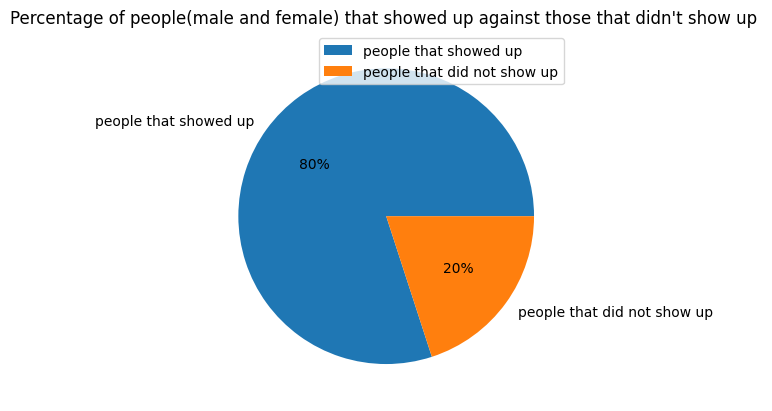

In [60]:
# 80% of the total number showed up
# 20% didn't show up
# let's put these values in a numpy array but without the percentage signs 
a =np.array([80, 20])
labels =['people that showed up','people that did not show up']
plt.pie(a,labels = labels, autopct = '%1.0f%%');
plt.title('Percentage of people(male and female) that showed up against those that didn\'t show up ')
plt.legend();

#### Clearly from the pie chart above, a large number of the people, both males and females showed up for their appointment as opposed to the very few that missed their appointment  

### Percentage of males and females that showed up against the percentage of the males and females that did not show up on a pie chart

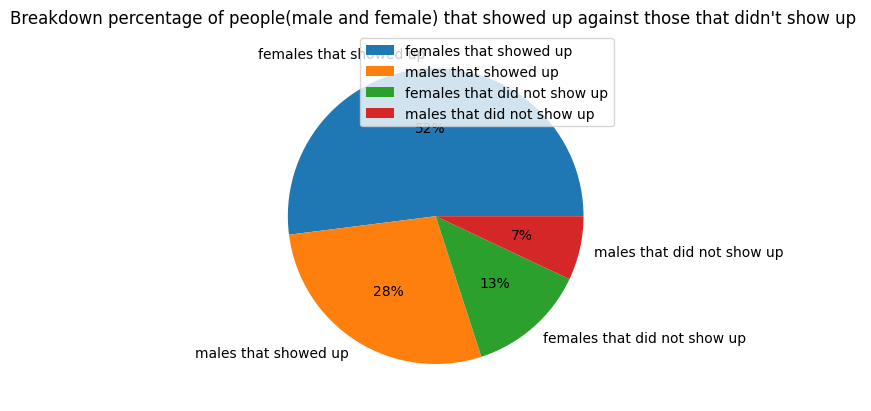

In [61]:
# 52% females showed up
# 28% males showed up
# 13% females did not show up
# 7% males did not show up
# let's put these values in a numpy array but without the percentage signs 
a =np.array([52, 28, 13, 7])
labels =['females that showed up','males that showed up', 'females that did not show up','males that did not show up']
plt.pie(a,labels = labels, autopct = '%1.0f%%');
plt.title('Breakdown percentage of people(male and female) that showed up against those that didn\'t show up ')
plt.legend();

#### from the pie charts  above : a large number of the people, both males and females showed up for their appointment which makes up 80% of the people. Among the 80%, 52% of them are females and 28% of them are males as opposed to the very few that missed their appointment making up 20% of the people which 13% of them are females and 7% being males.

### 2.how many females received sms and showed up as against those that did not receive any sms but still showed up ?

In [62]:
# females that receive sms and showed up
females_received_show_up = (df['Gender'] == 'F') & (df['SMS_received'] == 1)  & (df['No_show'] == 'No')

In [63]:
# dataframe  of the first five females that receive sms and showed up
df.loc[females_received_show_up].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
15,9.994839e+10,5620206,F,2016-04-26 08:47:27+00:00,2016-04-29 00:00:00+00:00,15,NOVA PALESTINA,0,0,0,0,0,1,No
18,1.713538e+13,5621836,F,2016-04-26 10:54:18+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,1,0,0,0,0,1,No
33,7.653517e+12,5616921,F,2016-04-25 15:01:04+00:00,2016-04-29 00:00:00+00:00,38,SÃO CRISTÓVÃO,1,0,0,0,0,1,No
62,3.647762e+13,5614045,F,2016-04-25 10:01:13+00:00,2016-04-29 00:00:00+00:00,3,CONQUISTA,1,0,0,0,0,1,No
68,5.434176e+12,5552915,F,2016-04-06 18:00:29+00:00,2016-04-29 00:00:00+00:00,69,JARDIM DA PENHA,0,1,0,0,0,1,No


In [64]:
# value counts
females_received_show_up.value_counts()

False    89840
True     17147
dtype: int64

In [65]:
# get the second line of the output above and assign it to f_r
f_r = females_received_show_up.value_counts()[1]
f_r

17147

17147 females received sms and showed up

### how many females did not receive sms but showed up?

In [66]:
# females that did not receive sms but showed up
females_received_no_show = (df['Gender'] == 'F') & (df['SMS_received'] == 0)  & (df['No_show'] == 'No')

In [67]:
# dataframe  of the first five females that did not receive sms but showed up
df.loc[females_received_no_show].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No


In [68]:
# value counts of female who received sms but did not show up for their appointment 
females_received_no_show.value_counts()

False    68291
True     38696
dtype: int64

In [69]:
# get the second line of the output above and assign it to f_nr
f_nr = females_received_no_show.value_counts()[1]
f_nr

38696

38696 females did not receive sms but still showed up

### plot the values of the females that received sms and showed up against those that did not receive sms but still showed up on a bar chart

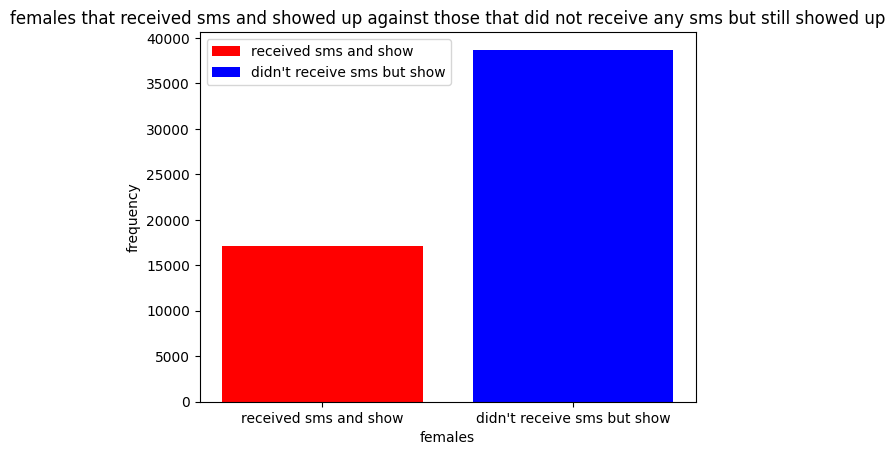

In [70]:
#values of the females that received sms and showed up 
#against those that did not receive sms but still showed up on a bar chart

# funtion to receive a list of values
# which will be used in a numpy array for plotting
def fun( arr = []):
    return (arr)

# labels = np.array(['received sms and show', 'didn\'t receive sms but show'])
labels = ['received sms and show', 'didn\'t receive sms but show']
freq = np.array(fun([f_r,f_nr]))
# freq = np.array([f_r,f_nr])
color = ['red', 'blue']


plt.bar( labels,freq, color = color , label = labels)
plt.xlabel('females');
plt.ylabel('frequency');
plt.title('females that received sms and showed up against those that did not receive any sms but still showed up');
plt.legend();

#### from the plot above, we can clearly see that more females showed up for their appointment despite not receiving any sms and that is nearly twice the size of the females that received the sms and showed up

### 3.
* what percentage of females are diabetic ?
* are there children who are diabetic ?
* how many diabetic and alcohollic showed up for the appointment ?


* ### percentage of females who are diabetic

#### females who are diabetic 

In [71]:
# females who are diabetic
# get the value count of diabetic females
females_and_diabetic = (df['Gender'] == 'F') & (df['Diabetes'] == 1)
females_and_diabetic.value_counts()

False    101381
True       5606
dtype: int64

In [72]:
# get the True part of the output above
# to get the number of diabetic females 
f_and_d = females_and_diabetic.value_counts()[1]
f_and_d

5606

5606 females are diabetic 

#### non-diabetic females

In [73]:
# non-diabetic females
# get the value count of  non-diabetic females
females_and_not_diabetic = (df['Gender'] == 'F') & (df['Diabetes'] == 0)
females_and_not_diabetic.value_counts()

True     64512
False    42475
dtype: int64

In [74]:
# get the True part of the output above
# to get the number of diabetic females
f_not_d =females_and_not_diabetic.value_counts()[0]
f_not_d

64512

64512 females are not diabetic

#### the total number of females 

In [75]:
# get the value count of the total number of females 
# and assign it to females_
females_  = (df['Gender'] == 'F').value_counts()
females_ 

True     70118
False    36869
Name: Gender, dtype: int64

In [76]:
# get the True part of the output above
# to get the total number of females 
females_[0] 

70118

70118 are females

#### percentage of diabetic females

In [77]:
# percentage of diabetic females
# round to the nearest whole number
((f_and_d / females_[0]) * 100).round()

8.0

of 70118 females, 8% of them are diabetic 

#### percentage of non-diabetic females

In [78]:
# percentage of non-diabetic females
# round to the nearest whole number
((f_not_d / females_[0]) * 100).round()

92.0

92% of the females are not diabetic.i.e the majority 

* ### are there female children who are diabetic? how many?

#### female children who are diabetic

In [79]:
# female children who are diabetic
child_females_and_diabetic = (df['Gender'] == 'F') & (df['Diabetes'] == 1) & (df['Age'] < 18)


In [80]:
# count of female children who are diabetic
child_females_and_diabetic.value_counts()

False    106949
True         38
dtype: int64

In [81]:
# get the True part of the output above
# to get the number of diabetic female children
# and assign it to f_d_c
f_d_c = child_females_and_diabetic.value_counts()[1]
f_d_c

38

from the above, 38 female children are diabetic 

#### female adults who are diabetic

In [82]:
# female adults who are diabetic
adult_females_and_diabetic = (df['Gender'] == 'F') & (df['Diabetes'] == 1) & (df['Age'] >= 18)

In [83]:
# count of female adults who are diabetic
adult_females_and_diabetic.value_counts()

False    101419
True       5568
dtype: int64

In [84]:
# get the True part of the output above
# to get the number of diabetic adults
# # and assign it to f_d_a
f_d_a =adult_females_and_diabetic.value_counts()[1]
f_d_a

5568

5568 female adults are diabetic

#### female adults who are not diabetic

In [85]:
# female adults who are not diabetic
adult_females_and_not_diabetic = (df['Gender'] == 'F') & (df['Diabetes'] == 0) & (df['Age'] >= 18)

In [86]:
# count of female adults who are not diabetic
adult_females_and_not_diabetic.value_counts()

False    54614
True     52373
dtype: int64

In [87]:
# get the True part of the output above
# to get the number of non-diabetic adults(female)
# and assign it to a_f_n_d
a_f_n_d = adult_females_and_not_diabetic.value_counts()[1]
a_f_n_d

52373

52373 are non-diabetic adults (female)

#### children who are not diabetic

In [88]:
# female children who are not diabetic
child_females_and_not_diabetic = (df['Gender'] == 'F') & (df['Diabetes'] == 0) & (df['Age'] < 18)

In [89]:
# count of female children who are not diabetic
child_females_and_not_diabetic.value_counts()

False    94848
True     12139
dtype: int64

In [90]:
# get the True part of the output above
# to get the number of diabetic adults
# and assign it to c_f_n_d
c_f_n_d = child_females_and_not_diabetic.value_counts()[1]
c_f_n_d

12139

12139 female children are not diabetic

### plot of the respective values of female diabetics  in their respective categories (diabetic females, non-diabetic females , diabetic female children, diabetic female adults, non-diabetic female children,non-diabetic female adults)

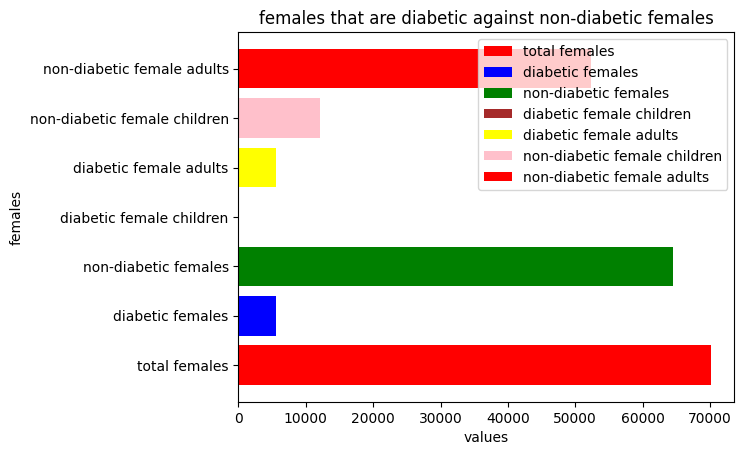

In [91]:
# plot of the respective values of female diabetics in their respective categories
#(diabetic females, non-diabetic females , diabetic female children, diabetic female adults,
#non-diabetic female children,non-diabetic female adults)

# funtion to receive a list of values
# which will be used in a numpy array for plotting
def fun( arr = []):
    return (arr)

labels = np.array(['total females', 'diabetic females','non-diabetic females', 'diabetic female children',
                  'diabetic female adults', 'non-diabetic female children','non-diabetic female adults'])
freq = np.array(fun([females_[0], f_and_d , f_not_d , f_d_c , f_d_a, c_f_n_d, a_f_n_d]))
color = ['red', 'blue', 'green', 'brown', 'yellow', 'pink']

plt.barh(labels, freq, color = color,label = labels);
plt.xlabel('values')
plt.ylabel('females')
plt.title('females that are diabetic against non-diabetic females');
plt.legend();

#### Out of about 70 thousand females, a large number of them are non-diabetic, which a large proportion of them are adults and very few being children. There more non-diabetic females as compared to the diabetic females.

NB: from the bar chart above, we can see that the 'diabetic female children' bar isn't showing, this is because it is too small.

* ### how many diabetics and alcoholics showed up for the appointment and how many did not? 


#### diabetics and alcoholics patients that showed up

In [92]:
# diabetics and alcoholics patients that showed up

diabetic_and_alcoholic_show = (df['Diabetes'] == 1) & (df['Alcoholism'] == 1 ) & (df['No_show'] == 'No')
# diabetic_and_alcoholic.value_counts()

In [93]:
# value counts of  diabetics and alcoholics patients that showed up
diabetic_and_alcoholic_show.value_counts()

False    106714
True        273
dtype: int64

In [94]:
# get the second line of the output above
# and assign to dia_and_alco_show
dia_and_alco_show = diabetic_and_alcoholic_show.value_counts()[1]
dia_and_alco_show

273

273 diabetic and alcoholic patients showed up

#### diabetic and alcoholic patients that did not show up

In [95]:
# diabetic and alcoholic patients that did not show up

diabetic_and_alcoholic_no_show = (df['Diabetes'] == 1) & (df['Alcoholism'] == 1 ) & (df['No_show'] == 'Yes')
diabetic_and_alcoholic_no_show.value_counts()

False    106928
True         59
dtype: int64

In [96]:
# value diabetic and alcoholic patients that did not show up
# and assign to dia_and_alco_no_show
dia_and_alco_no_show = diabetic_and_alcoholic_no_show.value_counts()[1]
dia_and_alco_no_show

59

59 diabetic and alcoholic patients did not show up

#### total number of diabetics and alcoholics

In [97]:
# total number of diabetics and alcoholics
# and the value counts
diabetic_and_alcoholic = (df['Diabetes'] == 1) & (df['Alcoholism'] == 1 )
diabetic_and_alcoholic.value_counts()

False    106655
True        332
dtype: int64

In [98]:
# get the second line of the output above and assign it to total
total = diabetic_and_alcoholic.value_counts()[1]
total

332

332 are diabetics and alcoholics

### plot of the respective values of  the number of diabetic and alcoholic patients  that did not  show up against  those that did on a bar chart

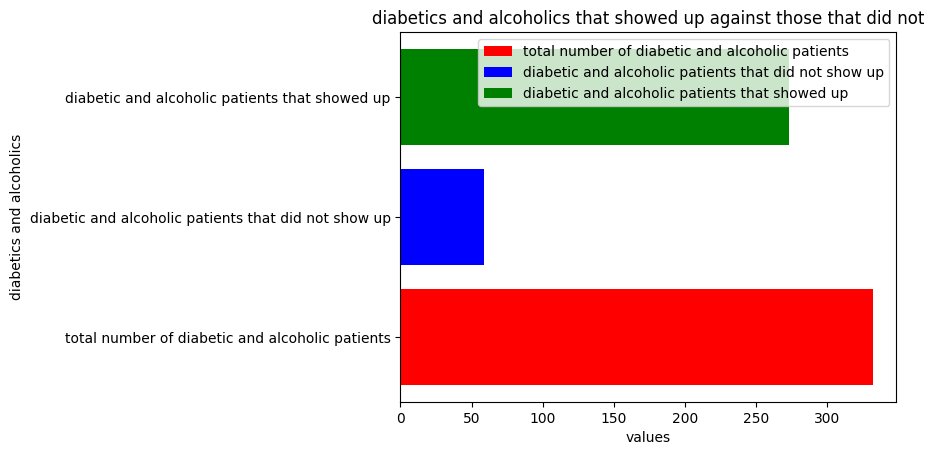

In [99]:
# plot of the respective values of the number of diabetic and alcoholic patients that did not show up 
# against those that did on a bar chart

labels = np.array(['total number of diabetic and alcoholic patients','diabetic and alcoholic patients that did not show up', 
                  'diabetic and alcoholic patients that showed up'])
freq = np.array([total, dia_and_alco_no_show , dia_and_alco_show  ])
color = ['red', 'blue', 'green']

plt.barh(labels, freq, color = color, label = labels);
plt.xlabel('values')
plt.ylabel('diabetics and alcoholics')
plt.title('diabetics and alcoholics that showed up against those that did not');
plt.legend();

### Out of 332 diabetics and alcoholics, roughly about 82% of them showed up for their appointment. i.e the majority while roughly 18% of them did not show up.

# Conclusion
A large number of the people are females and thus
much of my analyses were conducted on the female gender where I took a look at those who are diabetic or not among which some were children.
Also I was interested in those that received sms and showed up against those that didn't receive any sms but still showed up(nothing conclusive can be deducted out of that, as to whether the sms played a major part in they showing up or not as other factors haved to be considered before any solid assumption/conclusion can be made )

## Limitation
Ideally, I did not really encounter any limitations per se, per my analyses. But then again, per my analyses the sms received  or not is not enough predictor to determine whether or not a patient will show up for their appointment as other factors have to be considered too.